In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data_path = 'dataset.csv'
data= pd.read_csv(data_path)

In [2]:
#데이터 확인
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [4]:
#데이터에 결측치는 없는 것을 확인
data.isnull().any()

Marital status                                    False
Application mode                                  False
Application order                                 False
Course                                            False
Daytime/evening attendance                        False
Previous qualification                            False
Nacionality                                       False
Mother's qualification                            False
Father's qualification                            False
Mother's occupation                               False
Father's occupation                               False
Displaced                                         False
Educational special needs                         False
Debtor                                            False
Tuition fees up to date                           False
Gender                                            False
Scholarship holder                                False
Age at enrollment                               

# 수치형 라벨과 범주형 라벨 구분

In [6]:
numerical = ['Application order', 'Age at enrollment','Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP']

categorical = []
for col in data.columns[:-1]:
    if col not in numerical:
        categorical.append(col)

In [8]:
numerical

['Application order',
 'Age at enrollment',
 'Curricular units 1st sem (credited)',
 'Curricular units 1st sem (enrolled)',
 'Curricular units 1st sem (evaluations)',
 'Curricular units 1st sem (approved)',
 'Curricular units 1st sem (grade)',
 'Curricular units 1st sem (without evaluations)',
 'Curricular units 2nd sem (credited)',
 'Curricular units 2nd sem (enrolled)',
 'Curricular units 2nd sem (evaluations)',
 'Curricular units 2nd sem (approved)',
 'Curricular units 2nd sem (grade)',
 'Curricular units 2nd sem (without evaluations)',
 'Unemployment rate',
 'Inflation rate',
 'GDP']

# 범주형 데이터별 Dropout 비율 신뢰구간

c:\Users\user\anaconda3\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2246: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
c:\Users\user\anaconda3\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2247: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


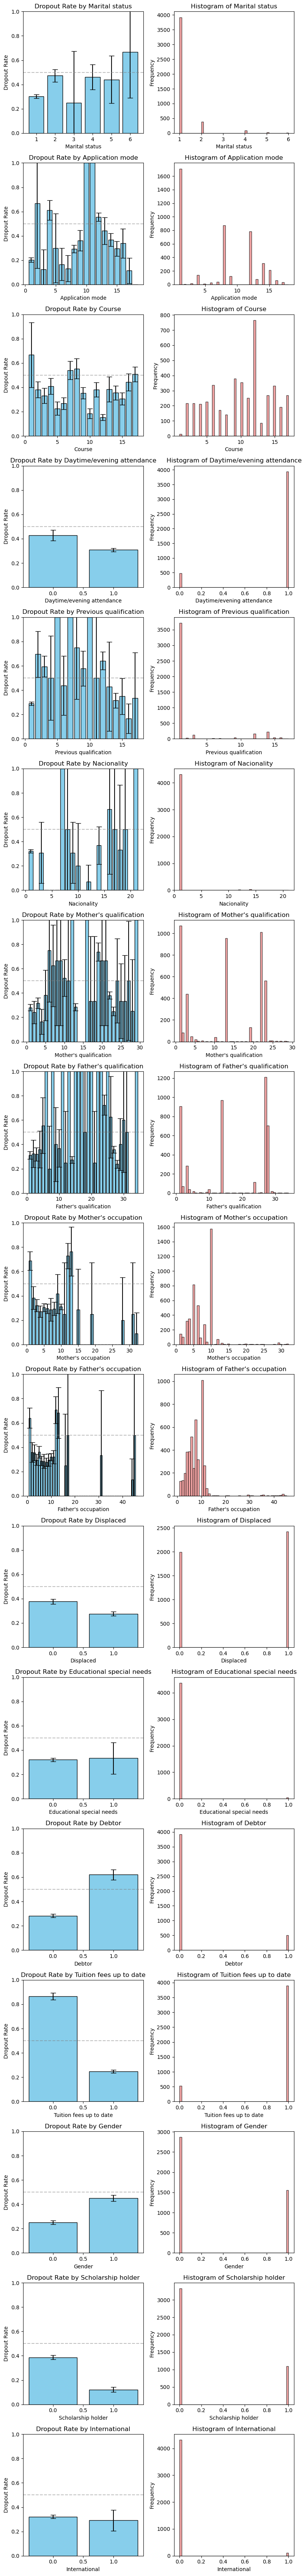

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

data['dropout'] = (data['Target'] == 'Dropout').astype(int)
n_features = len(categorical)

nrows = n_features  # feature 개수만큼 행 배치
ncols = 2  # 1열: 신뢰구간 그래프, 2열: 히스토그램

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(8, 4 * nrows))  # 적절한 크기 조정
axes = axes.reshape(nrows, ncols)  # 2D 배열 유지

for i, feature in enumerate(categorical):
    ax1 = axes[i, 0]  # 신뢰구간 그래프
    ax2 = axes[i, 1]  # 히스토그램
    
    # --- (1) Dropout 비율 + 신뢰구간 ---
    grouped = data.groupby(feature)['dropout']
    dropout_rate = grouped.mean()
    n = grouped.count()
    
    ci_lower, ci_upper = st.norm.interval(0.95, loc=dropout_rate, scale=np.sqrt((dropout_rate * (1 - dropout_rate)) / n))
    
    ax1.bar(dropout_rate.index, dropout_rate, yerr=[dropout_rate - ci_lower, ci_upper - dropout_rate], 
            capsize=5, color='skyblue', edgecolor='black')
    ax1.set_title(f"Dropout Rate by {feature}")
    ax1.set_xlabel(feature)
    ax1.set_ylabel("Dropout Rate")
    ax1.set_ylim(0, 1)
    ax1.axhline(y=0.5, color='gray', linestyle='--', alpha=0.5)

    # --- (2) 히스토그램 ---
    ax2.hist(data[feature], bins=50, color='lightcoral', edgecolor='black', alpha=0.7)
    ax2.set_title(f"Histogram of {feature}")
    ax2.set_xlabel(feature)
    ax2.set_ylabel("Frequency")

plt.tight_layout()
plt.show()


# Numerical data에 대한 이상치 파악

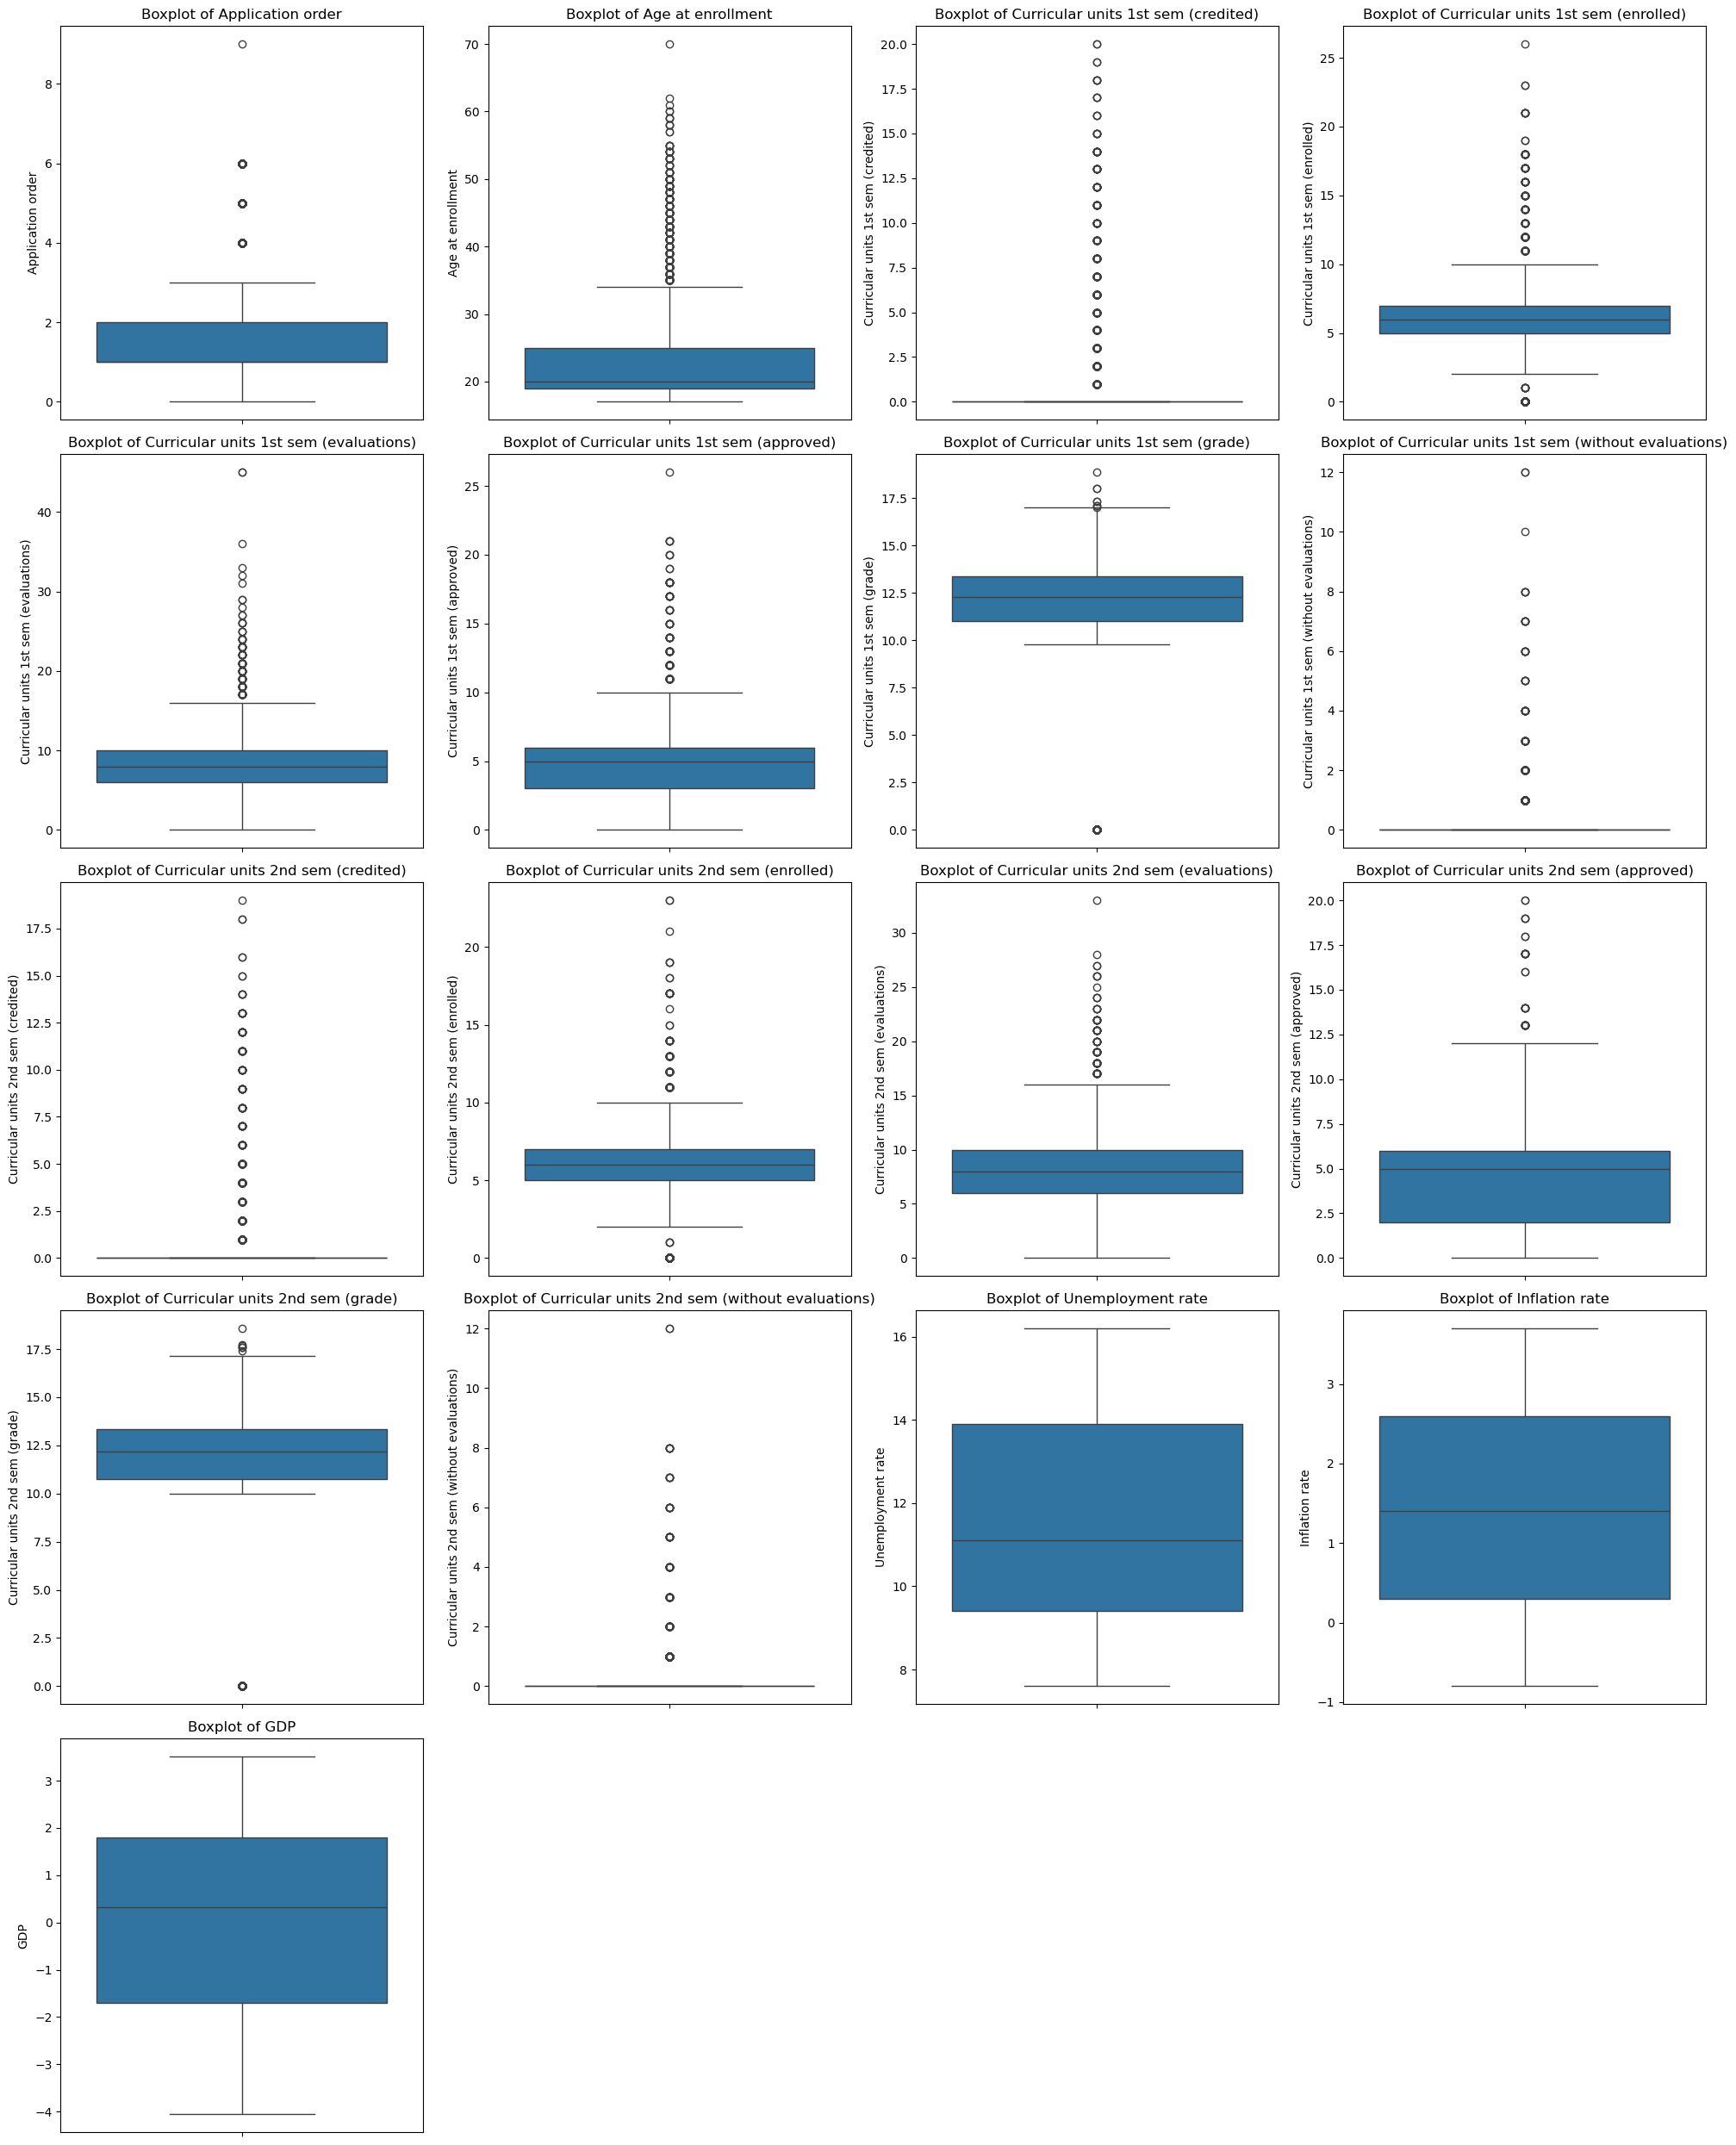

In [7]:
# boxplot으로 우선 시각적으로 파악
fig, axes = plt.subplots(5, 4, figsize=(20, 25))  

for i, col in enumerate(numerical):
    row = i // 4  
    col_num = i % 4  
    sns.boxplot(data=data[col], ax=axes[row, col_num])
    axes[row, col_num].set_title(f'Boxplot of {col}')


for j in range(i + 1, 20):  
    col_num = j % 4
    axes[row, col_num].axis('off')


plt.tight_layout()
plt.show()

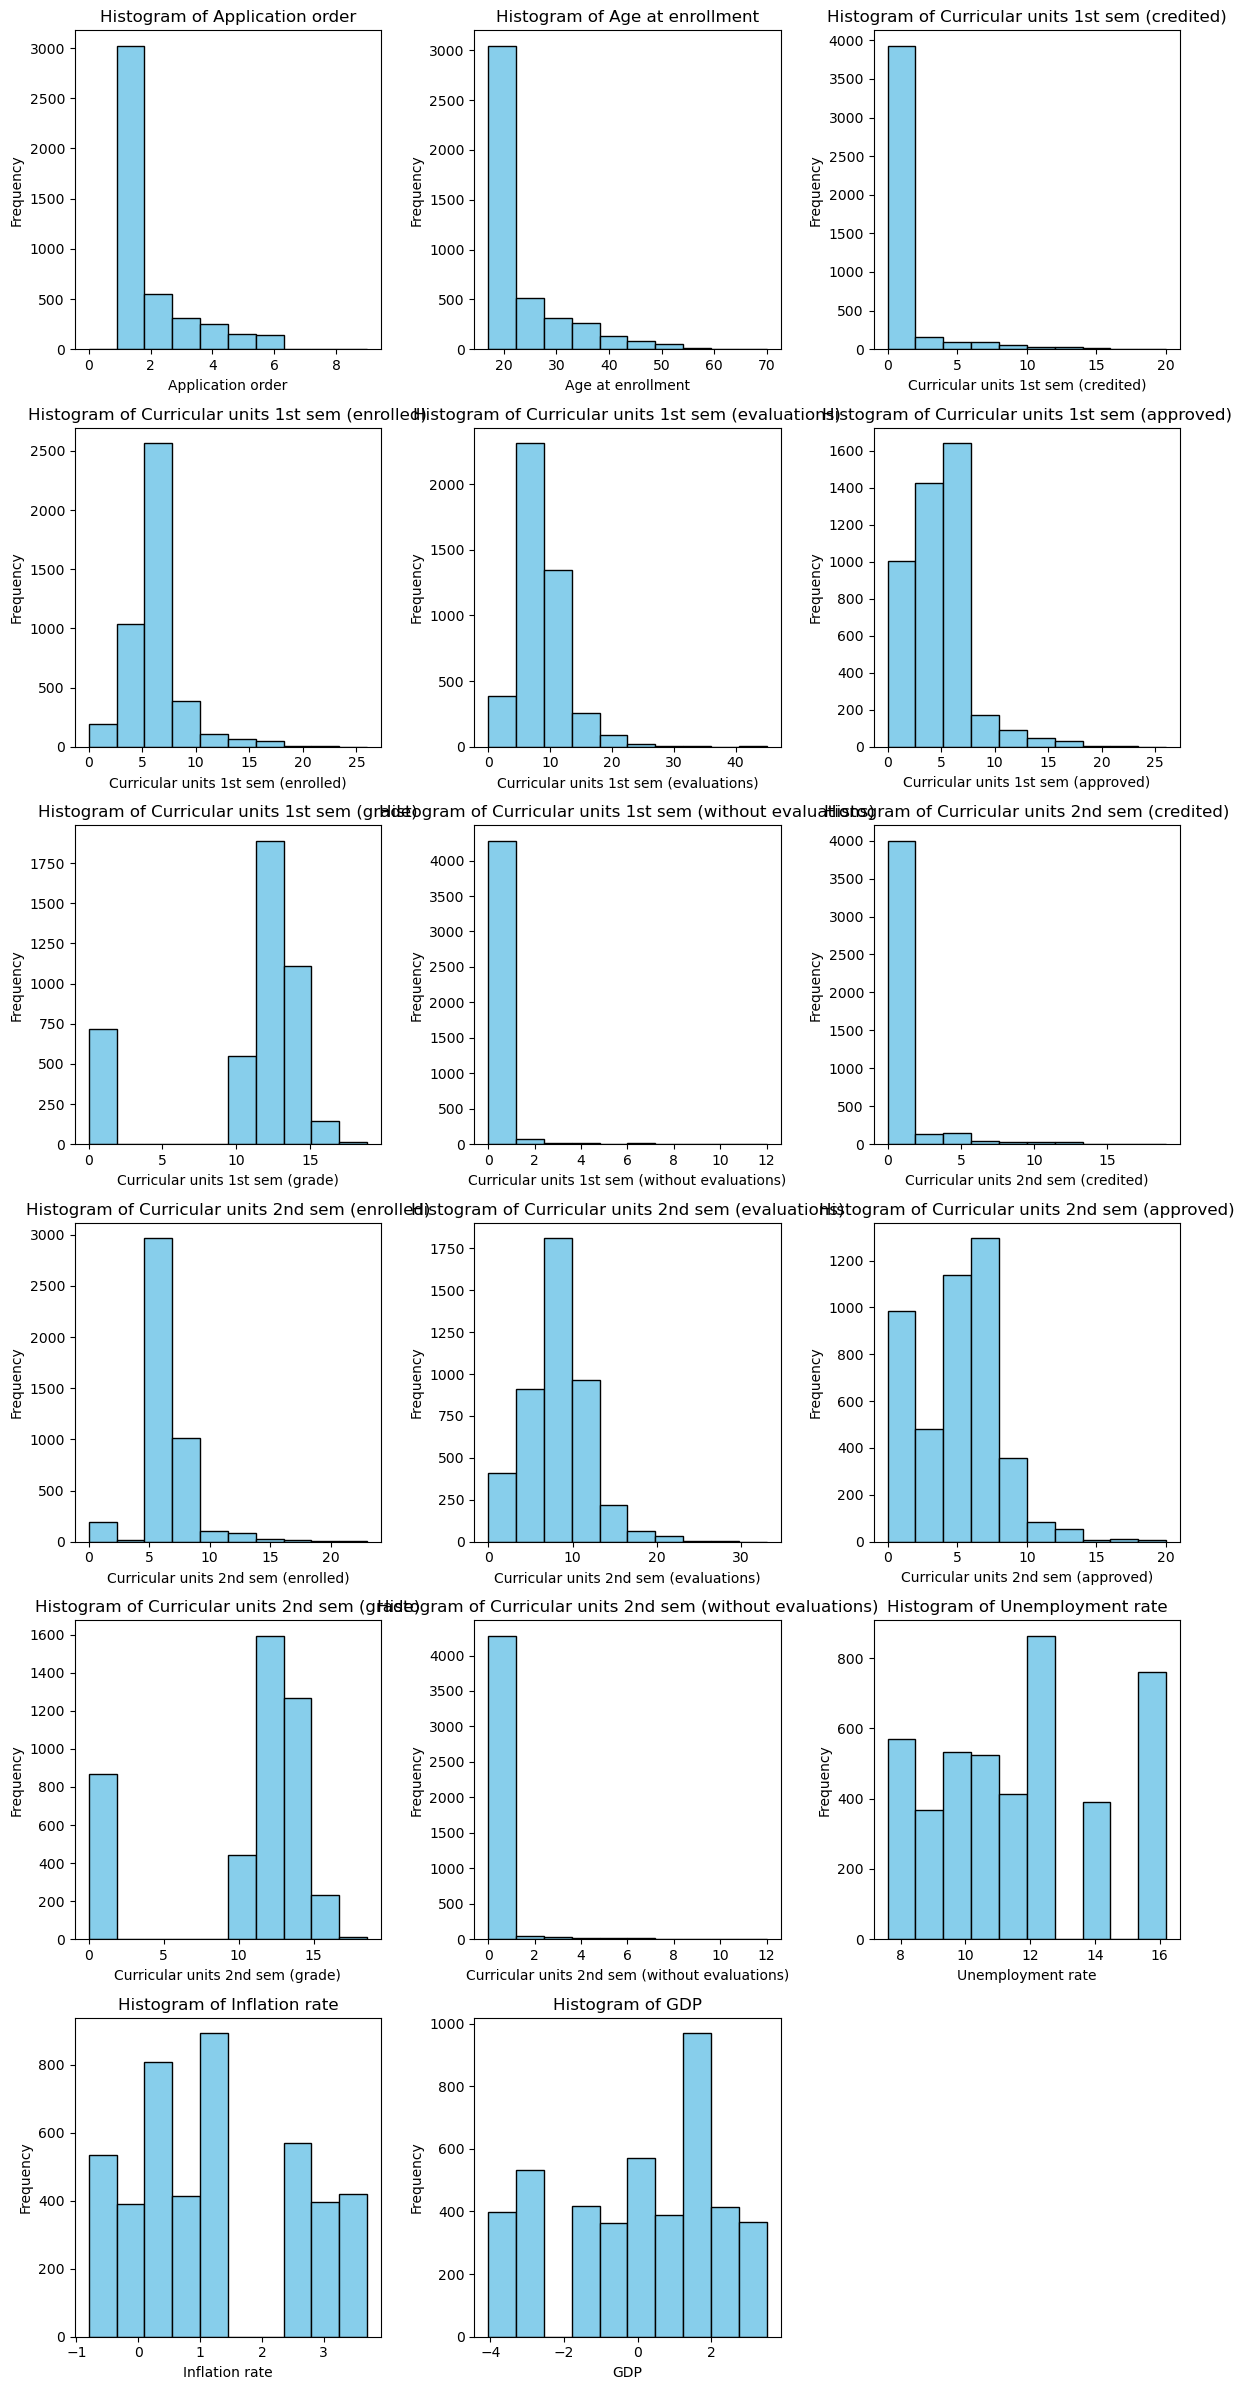

In [8]:
import math
import matplotlib.pyplot as plt

num_columns = len(numerical)  # numerical 변수 개수
ncols = 3  # 가로 3개 고정
nrows = math.ceil(num_columns / ncols)  # 필요한 행 개수 계산

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 4, nrows * 4))
axes = axes.flatten()  # 1D 배열로 변환

for i, column in enumerate(numerical):
    axes[i].hist(data[column], bins=10, color='skyblue', edgecolor='black')
    axes[i].set_title(f"Histogram of {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Frequency")

# 남는 빈 그래프 삭제
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [9]:
import warnings
def remove_rows_with_outliers(df, columns):
    cleaned_df = df.copy() 
    
    rows_to_remove = pd.Series([False] * len(df))
    
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = (df[column] < lower_bound) | (df[column] > upper_bound)
        rows_to_remove |= outliers 
        cleaned_df = cleaned_df[~rows_to_remove]
        warnings.filterwarnings("ignore")
    return cleaned_df

data2 = remove_rows_with_outliers(data, numerical)

len(data2)
# 하나라도 이상치가 있는 경우 행을 제거했는데, 절반 가량이 날아감
# 보다 다른 판단을 할 필요가 있음.

2077

# 이상치 제거


생각해봐야할 것들

단순히 boxplot을 그리고 1.5*IQR을 넘어간다고 해당 데이터가 이상치라 간주할 수 있는가?


이상치 역시 실제로 분포할 수 있는 데이터이다.

무턱대고 이상치를 제거하는 것은 데이터의 양도 줄이고, 데이터를 훼손시킬 수도 있다고 판단

1. 이상치라고 추정되는 값들이 실제 진짜 이상치인가?
2. 이상치 제거 후 데이터의 양이 유의미하게 존재하는가?

# 편향된 데이터에서 이상치 처리방법?

생각해낸 방법 : numerical하지만, 0에 대부분 몰려있기 때문에 0이냐 아니냐로 categorical하게 만들어버리자.


In [10]:
data['Curricular units 1st sem (credited)'] = data['Curricular units 1st sem (credited)'].apply(lambda x: 0 if x == 0 else 1)
data['Curricular units 2nd sem (credited)'] = data['Curricular units 2nd sem (credited)'].apply(lambda x: 0 if x == 0 else 1)
data['Curricular units 1st sem (without evaluations)'] = data['Curricular units 1st sem (without evaluations)'].apply(lambda x: 0 if x == 0 else 1)
data['Curricular units 2nd sem (without evaluations)'] = data['Curricular units 2nd sem (without evaluations)'].apply(lambda x: 0 if x == 0 else 1)

cat = ['Curricular units 1st sem (credited)', 'Curricular units 2nd sem (credited)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (without evaluations)']

# 그렇다면 이렇게 만든 범주형 데이터는 활용할만한가?

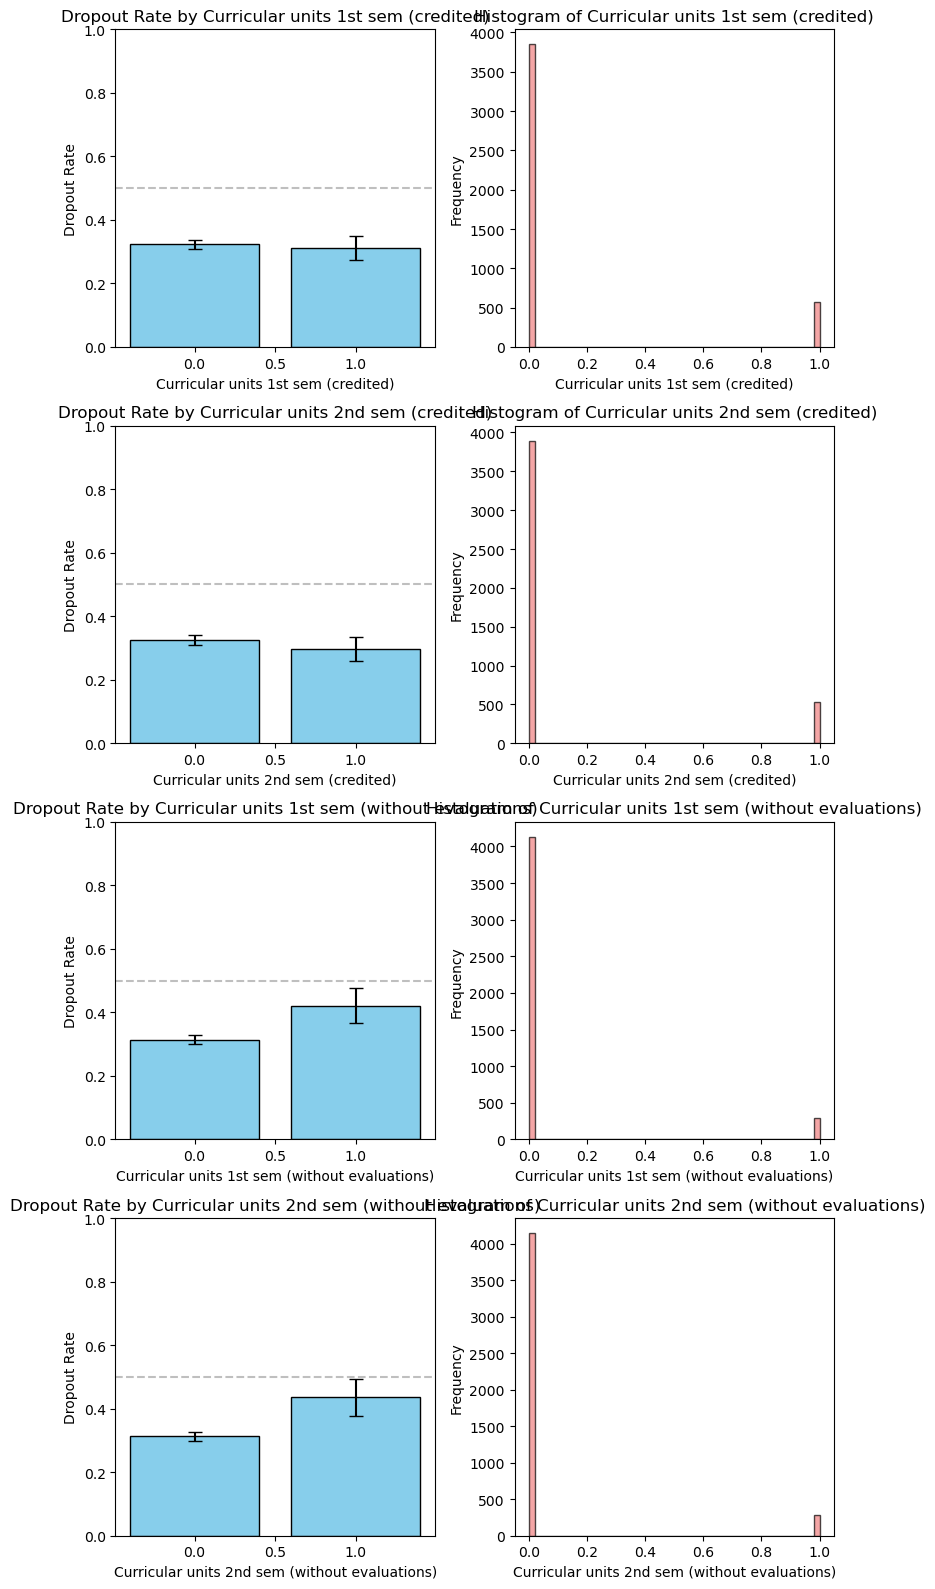

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st


nrows = 4  # feature 개수만큼 행 배치
ncols = 2  # 1열: 신뢰구간 그래프, 2열: 히스토그램

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(8, 4 * nrows))  # 적절한 크기 조정
axes = axes.reshape(nrows, ncols)  # 2D 배열 유지

for i, feature in enumerate(cat):
    ax1 = axes[i, 0]  # 신뢰구간 그래프
    ax2 = axes[i, 1]  # 히스토그램
    
    # --- (1) Dropout 비율 + 신뢰구간 ---
    grouped = data.groupby(feature)['dropout']
    dropout_rate = grouped.mean()
    n = grouped.count()
    
    ci_lower, ci_upper = st.norm.interval(0.95, loc=dropout_rate, scale=np.sqrt((dropout_rate * (1 - dropout_rate)) / n))
    
    ax1.bar(dropout_rate.index, dropout_rate, yerr=[dropout_rate - ci_lower, ci_upper - dropout_rate], 
            capsize=5, color='skyblue', edgecolor='black')
    ax1.set_title(f"Dropout Rate by {feature}")
    ax1.set_xlabel(feature)
    ax1.set_ylabel("Dropout Rate")
    ax1.set_ylim(0, 1)
    ax1.axhline(y=0.5, color='gray', linestyle='--', alpha=0.5)

    # --- (2) 히스토그램 ---
    ax2.hist(data[feature], bins=50, color='lightcoral', edgecolor='black', alpha=0.7)
    ax2.set_title(f"Histogram of {feature}")
    ax2.set_xlabel(feature)
    ax2.set_ylabel("Frequency")

plt.tight_layout()
plt.show()


# 수치형 데이터에 대한 파악

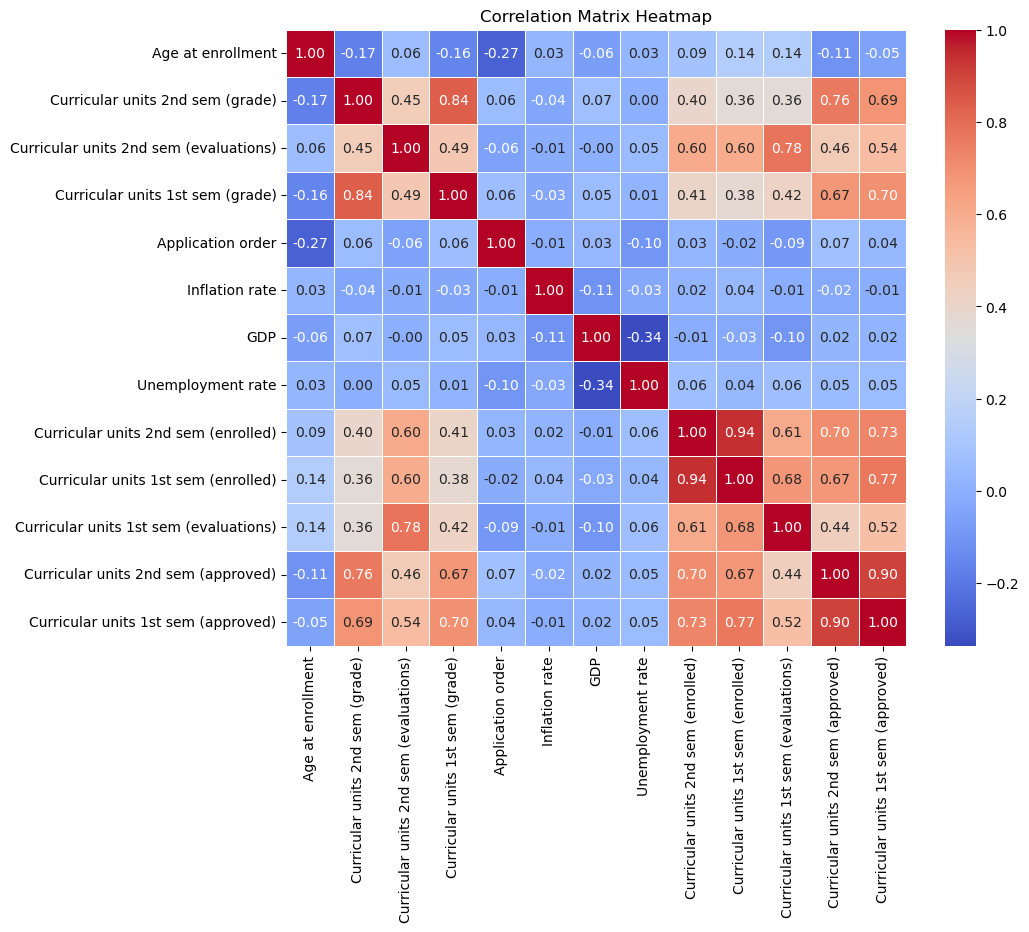

In [12]:

numerical = list(set(numerical)- set(cat))

corr_matrix = (data[numerical]).corr()

# Heatmap 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# 제목 추가
plt.title("Correlation Matrix Heatmap")
plt.show()

# Feature selection

## 1 Numerical data
위의 상관계수 heatmap에서 알 수 있듯이, numerical 데이터 중에서

Curricular units 1st sem(enrolled) & Curricular units 2nd sem (enrolled)


Curricular units 1st sem(approved) & Curricular units 2nd sem (approved)


Curricular units 1st sem(evaluations) & Curricular units 2nd sem (evaluations)

Curricular units 1st sem(grade) & Curricular units 2nd sem (grade)


간의 상관계수가 각각 0.94, 0.90, 0.84로 상당히 높다. 

따라서, 두 변수 중 하나의 변수를 제거하는 것이 좋아보이는데, 각 변수는 독립된 기간에 대한 데이터이므로 
1년 동안의 학점수를 나타내는 지표로 두 값을 평균 낸 값을 새로운 지표로 사용하고자 했다.



In [13]:
data['Curricular units(enrolled)'] = (data['Curricular units 1st sem (enrolled)'] + data['Curricular units 2nd sem (enrolled)']) /2
data['Curricular units(approved)'] = (data['Curricular units 1st sem (approved)'] + data['Curricular units 2nd sem (approved)']) /2
data['Curricular units(evaluations)'] = (data['Curricular units 1st sem (evaluations)'] + data['Curricular units 2nd sem (evaluations)']) /2

data['Curricular units(grade)'] = (data['Curricular units 1st sem (grade)'] + data['Curricular units 2nd sem (grade)']) /2



drop_list = ['Curricular units 1st sem (enrolled)', 'Curricular units 2nd sem (enrolled)'
             , 'Curricular units 1st sem (approved)', 'Curricular units 2nd sem (approved)'
             , 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)'
             , 'Curricular units 2nd sem (credited)' , 'Curricular units 1st sem (credited)'
             ,'Curricular units 1st sem (evaluations)', 'Curricular units 2nd sem (evaluations)'
             , 'Marital status', 'Previous qualification', 'Nacionality', "Mother's qualification"
             , "Father's qualification", "Mother's occupation", "Father's occupation", 'Educational special needs'
             ,'International']

for col in drop_list:
    data = data.drop(col, axis = 1)


#최종 feature
data.columns

Index(['Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Displaced', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (without evaluations)', 'Unemployment rate',
       'Inflation rate', 'GDP', 'Target', 'dropout',
       'Curricular units(enrolled)', 'Curricular units(approved)',
       'Curricular units(evaluations)', 'Curricular units(grade)'],
      dtype='object')

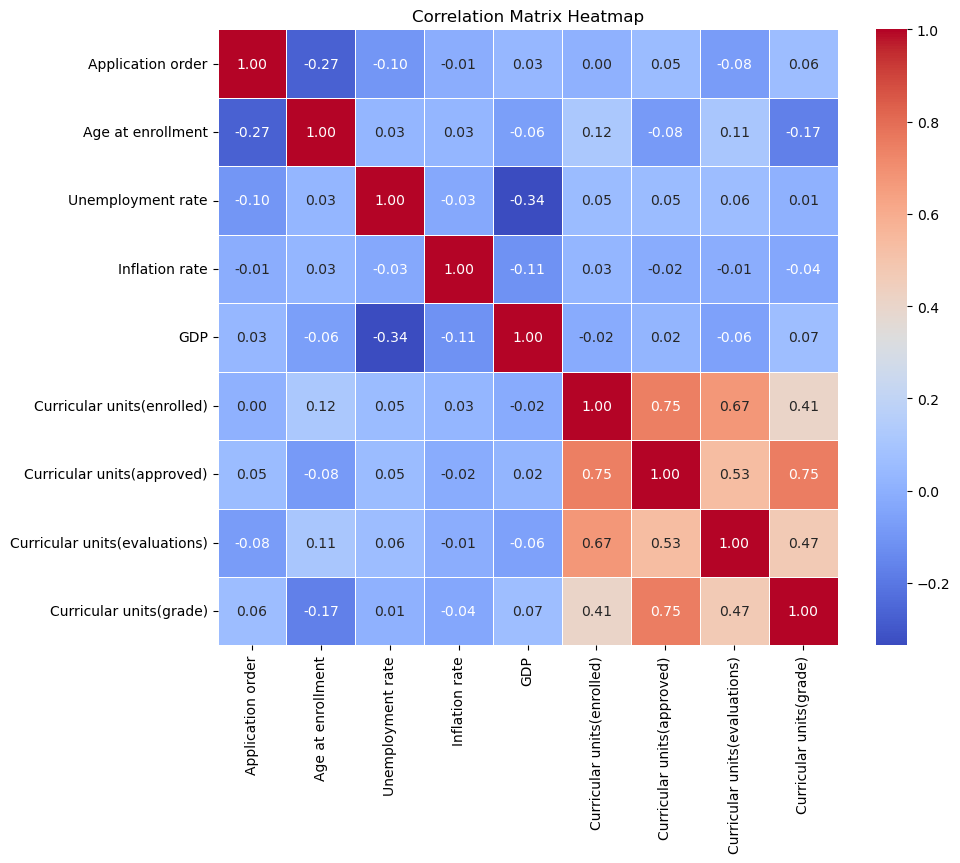

In [14]:
final_numerical = [ 'Application order', 
       'Age at enrollment',  'Unemployment rate',
       'Inflation rate', 'GDP', 'Curricular units(enrolled)', 'Curricular units(approved)',
       'Curricular units(evaluations)', 'Curricular units(grade)']



corr_matrix = (data[final_numerical]).corr()

# Heatmap 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# 제목 추가
plt.title("Correlation Matrix Heatmap")
plt.show()

# 주요 분석 결과 및 인사이트

### 1. 주어진 데이터를 크게 범주형, 수치형 데이터로 나누어 분석을 진행


 - 범주형 데이터의 경우 각 범주별로 타겟 변수의 비율과 신뢰구간을 바탕으로 타겟 변수에 대한 설명력을 분석
 - 그 결과, Application mode, Course, Daytime/Evening attendence, Displaced, Debtor, Tuition fees, Gender, Scholorship 변수들을 모델 학습에 활용할 수 있다고 판단
 - 의외로 활용할 수 있는 변수의 수가 많지 않음을 알 수 있음


### 2. 수치형 데이터의 경우, 이상치 분석과 상관계수를 통한 feature selection을 진행
 - 데이터의 분포가 고르지 않아 생기는 이상치에 대한 처리 기법으로 범주형 변수화를 진행
 - 그 결과, 타겟 변수를 잘 설명하는 변수로 사용할 수 있음을 신뢰구간을 통해 확인
 - 상관계수 분석을 통해 서로 높은 상관관계를 가지는 변수들을 하나로 통합하는 과정을 거침
 - feature를 제거할 수도 있지만, 정보를 그냥 버리는 것은 아까워 1년 동안의 학점(성적)이라는 직관적인 의미로 이해할 수 있는 평균을 사용해서 새로운 파생변수 생성

### 위와 같은 과정을 통해 34개였던 독립 변수를 의미있는 19개의 변수로 줄이는 것이 가능해짐    

# 한계점 및 보완할 점

### 1. 수치형 변수에 대하여 타겟 변수를 설명하는 능력을 어떻게 측정할 것인가?
- 수치형 변수에 대해서는 타겟 변수와의 관계를 직접적으로 파악하는 과정이 없었기 때문에, 설명력이 부족한 변수가 있을 수 있다.

### 2. 피처 엔지니어링 기법의 타당성은 어떻게 측정할 것인가?
- 모델 학습 후에 만족스럽지 않으면 다시 피처 엔지니어링 파트로 돌아와서 수정 후 다시 모델 평가 이를 반복?

### 3. 조금 더 많은 파생 변수를 만드는 것을 목표로 했으나, 생각만큼 잘 되지 않았음. 
- 데이터의 태생적 한계인지, 내 창의력 부족인지 모르겠지만, 더 고민이 필요함

### 4. 범주형 데이터에 대한 인코딩
- 세션에서 다룬 target encoding 기법을 고려해볼 수 있을 것 같음